# **<font style="color:blue">Project 4: Kaggle Competition - Semantic Segmentation</font>**

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Section</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>1.1. Dataset Class</h3></td> <td><h3>7</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>1.2. Visualize dataset</h3></td> <td><h3>3</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>2. Evaluation Metrics</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>4</h3></td> <td><h3>3. Model</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>5</h3></td> <td><h3>4.1. Train</h3></td> <td><h3>7</h3></td> </tr>
        <tr><td><h3>6</h3></td> <td><h3>4.2. Inference</h3></td> <td><h3>3</h3></td> </tr>
        <tr><td><h3>7</h3></td> <td><h3>5. Prepare Submission CSV</h3></td><td><h3>10</h3></td> </tr>
        <tr><td><h3>8</h3></td> <td><h3>6. Kaggle Profile Link</h3></td> <td><h3>50</h3></td> </tr>
    </table>
</div>

---

**In this project, you have participated in the Kaggle competition, and also submit the notebook and othe code in the course lab.**

**This Kaggle competition is a semantic segmentation challenge.**

<h2>Dataset Description </h2>
<p>The dataset consists of 3,269 images in 12 classes (including background). All images were taken from drones in a variety of scales. Samples are shown below:
<img src="https://github.com/ishann/aeroscapes/blob/master/assets/data_montage.png?raw=true" width="800" height="800">
<p>The data was splitted into public train set and private test set which is used for evaluation of submissions. You can split public subset into train and validation sets yourself.
Images are named with a unique <code>ImageId</code>. </p>
<p> You should segment and classify the images in the test set.</p>
<p>The dataset consists of landscape images taken from drones in a variety of scales.</p>

**The notebook is divided into sections. You have to write code, as mention in the section.  For other helper functions, you can write `.py` files and import them in the notebook. You have to submit the notebook along with `.py` files. Your submitted code must be runnable without any bug.**

# **<font style="color:green">1. Add and Import libraries</font>**

In [1]:
!pip uninstall -y tensorflow
print("Optuna install...")
!pip install -qq -U optuna
print("Optuna-dashboard install...")
!pip install -qq -U optuna-dashboard
print("Struclog install...")
!pip install -qq -U structlog
#print("Onnx install...")
#!pip install -qq onnx 
print("Onnxruntime install...")
!pip install -qq onnxruntime
print("Tensorboard install...")
!pip install -qq tensorboard

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Optuna install...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 9.9 MB/s eta 0:00:00:00:01
Optuna-dashboard install...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 40.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.8/103.8 kB 6.2 MB/s eta 0:00:00
Struclog install...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 kB 2.7 MB/s eta 0:00:00
Onnxruntime install...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 35.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.1 MB/s eta 0:00:00
Tensorboard install...


In [2]:
print(100 * "-")
%pip show optuna
print(100 * "-")
%pip show optuna-dashboard
print(100 * "-")
%pip show structlog
print(100 * "-")
%pip show onnx
print(100 * "-")
%pip show onnxruntime
print(100 * "-")
%pip show torch
print(100 * "-")
%pip show tensorboard
print(100 * "-")

----------------------------------------------------------------------------------------------------
Name: optuna
Version: 4.5.0
Summary: A hyperparameter optimization framework
Home-page: https://optuna.org/
Author: Takuya Akiba
Author-email: 
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: alembic, colorlog, numpy, packaging, PyYAML, sqlalchemy, tqdm
Required-by: optuna-dashboard
Note: you may need to restart the kernel to use updated packages.
----------------------------------------------------------------------------------------------------
Name: optuna-dashboard
Version: 0.19.0
Summary: Real-time dashboard for Optuna
Home-page: https://github.com/optuna/optuna-dashboard
Author: 
Author-email: Masashi Shibata <mshibata@preferred.jp>
License: MIT License
Location: /usr/local/lib/python3.11/dist-packages
Requires: bottle, optuna, packaging, scikit-learn
Required-by: 
Note: you may need to restart the kernel to use updated packages.
-----------------------------

In [3]:
import os
import json
import sys
import shutil
import random
import time
import datetime
import math
import zipfile
import threading
import cv2

import logging
import structlog

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms

from torch.utils.data import Dataset, DataLoader, random_split
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter

from PIL import Image, ImageDraw, ImageFont, ImageEnhance, ImageFilter

from sklearn.metrics import jaccard_score

import optuna
from optuna.trial import Trial
from optuna import visualization 
from optuna_dashboard import run_server

import onnx
import onnxruntime as ort

from tqdm import tqdm

# **<font style="color:green">2. Data Exploration</font>**

## ***<font style="color:purple">2.1. Base Functions</font>***

In [4]:
def copy_and_zip_folder(source_folder, destination_folder, zip_filename):
    """Copies a folder to a new location and then packs it into a ZIP file.

    Args:
        source_folder (_type_): Path to the source folder you want to copy.
        destination_folder (_type_): Path to the destination folder where the contents should be copied.
        zip_filename (_type_): Name of the ZIP file (e.g. 'archiv.zip').
    """  
    try:
        # Copying an entire folder to a new location
        shutil.copytree(source_folder, destination_folder)
        print(f"The folder '{source_folder}' was successfully copied to '{destination_folder}'.")

        # Create a ZIP archive from the copied folder
        # A ZIP file named 'archiv.zip' will be created at the same level as the copied folder
        zip_path = os.path.join(os.path.dirname(destination_folder), zip_filename)
        with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
            for root, dirs, files in os.walk(destination_folder):
                for file in files:
                    file_path = os.path.join(root, file)
                    # Create a relative path so that there are no absolute paths in the ZIP
                    relative_path = os.path.relpath(file_path, os.path.dirname(destination_folder))
                    zipf.write(file_path, relative_path)
        
        print(f"The folder '{destination_folder}' was successfully packed into '{zip_path}'.")

    except FileExistsError:
        print(f"Error: Destination folder '{destination_folder}' already exists. Please delete it or change the path.")
    except Exception as e:
        print(f"An error occurred: {e}")


```python
source = "<input_path>"
destination = "<output_path>"
zip_file = "<name_file>.zip"

copy_and_zip_folder(source, destination, zip_file)
```

## ***<font style="color:purple">2.2. Dataset Class</font>***

### *<font style="color:brown">2.2.1 Global settings for dataset</font>*


In [5]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
NUM_CLASSES = 12  # Background included
DATA_PATH = os.path.join('/kaggle','input','opencv-pytorch-segmentation-project-round2')
IMAGES_FOLDER = os.path.join('imgs','imgs')
MASKS_FOLDER = os.path.join('masks','masks')
CSV_PATH_TRAIN = 'train.csv'  
CSV_PATH_TEST = 'test.csv'

### *<font style="color:brown">2.2.2 Class definition</font>*

In [6]:
class SemSegDataset(Dataset):
    """Custom Dataset for semantic segmentation

    Args:
        data_path (str): Path to data directories.
        images_folder (str): Folder with images (.jpg).
        masks_folder (str): Folder with masks (.png).
        csv_path (str): Path to CSV file with ImageID.
        image_ids (list, optional): ImageID list (if not specified, it will be loaded from CSV).
        train_val_test (str): Dataset mode ('train', 'val', 'test'). Default 'train'.
        transforms (callable, optional): Transformations for images (e.g. normalization).
        class_names (list, optional): Class names (default 0-11).
        mask_suffix (str, optional): Mask name suffix (e.g. '_mask'). Default ''.

    Returns:
        tuple: (image, mask) as torch tensors.
    """
    def __init__(self, data_path, images_folder, masks_folder, csv_path, image_ids=None, train_val_test='train', transforms=None, class_names=None, mask_suffix=''):
        self.data_path = data_path
        self.images_folder = images_folder
        self.masks_folder = masks_folder
        self.transforms = transforms
        self.class_names = class_names or [str(i) for i in range(NUM_CLASSES)]
        self.train_val_test = train_val_test
        self.mask_suffix = mask_suffix
        
        # Retrieving ImageID from CSV using Polars with explicit String dtype
        try:
            df = pl.read_csv(
                os.path.join(data_path, csv_path),
                schema_overrides={'ImageID': pl.String}
            )
            self.image_ids = image_ids or df['ImageID'].to_list()
        except Exception as e:
            raise ValueError(f"Error loading CSV {csv_path}: {str(e)}")

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        img_id = self.image_ids[idx]
        img_path = os.path.join(self.data_path, self.images_folder, f"{img_id}.jpg")
        mask_path = os.path.join(self.data_path, self.masks_folder, f"{img_id}{self.mask_suffix}.png") if self.train_val_test != 'test' else None
        
        try:
            image = Image.open(img_path).convert("RGB")
        except FileNotFoundError:
            raise FileNotFoundError(f"Image not found: {img_path}")
        
        mask = torch.zeros((512, 512), dtype=torch.long)  # Default dummy mask for test
        if mask_path:
            try:
                mask_img = Image.open(mask_path).convert("L")
                # Adjust resolution and convert to classes 0-11
                mask_img = transforms.Resize((512, 512), interpolation=Image.NEAREST)(mask_img)
                mask_np = np.array(mask_img)  # 0-255
                if mask_np.max() > 11:  # Convert grayscale to classes
                    mask = torch.from_numpy((mask_np / 255 * (NUM_CLASSES - 1)).astype(np.uint8))
                else:
                    mask = torch.from_numpy(mask_np)
                # Debug: Check the range of values
                if idx < 5:
                    print(f"Sample {idx} - Mask unique values: {torch.unique(mask)}")
            except FileNotFoundError:
                warnings.warn(f"Mask not found: {mask_path}. Dummy mask used.")
                mask = torch.zeros((512, 512), dtype=torch.long)
        
        if self.transforms:
            image = self.transforms(image)  # Applying transformations to an image
            # We don't convert the mask to ToTensor() because it is already a tensor
            # Instead, we convert it to the correct type and shape
            mask = mask.long()  # Ensures that the mask is a long tensor
        
        return image, mask.squeeze()  # Mask as a long tensor for CrossEntropy

### *<font style="color:brown">2.2.3 Definition of transformation</font>*

In [7]:
train_transforms = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

### *<font style="color:brown">2.2.4 Dataset creation and split dataset</font>*

In [8]:
full_dataset = SemSegDataset(DATA_PATH, IMAGES_FOLDER, MASKS_FOLDER, CSV_PATH_TRAIN, transforms=train_transforms)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

# train and validation dataset
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])
# test dataset
test_dataset = SemSegDataset(DATA_PATH, IMAGES_FOLDER, MASKS_FOLDER, CSV_PATH_TEST, train_val_test='test', transforms=train_transforms)

## ***<font style="color:purple">2.3. Visualize dataset</font>***

### *<font style="color:brown">2.3.1 Function definition</font>*

In [9]:
def visualize_samples(dataset, num_samples=5):
    """Visualization of dataset samples with discrete colors for each mask class.

    Args:
        dataset (SemSegDataset): Dataset with images and masks.
        num_samples (int): Number of samples to display. Default 5.
    """
    colors = [
        [0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1],
        [0, 1, 1], [1, 0.5, 0], [0.5, 0, 0.5], [0.5, 0.5, 0], [0.5, 0, 1], [0, 0.5, 0.5]
    ]  # RGB for 0-11

    fig, axes = plt.subplots(num_samples, 2, figsize=(10, num_samples * 5))
    for i in range(num_samples):
        img, mask = dataset[i]
        img = img.permute(1, 2, 0).numpy() * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)
        
        mask_np = mask.numpy().astype(np.uint8)
        h, w = mask_np.shape
        colored_mask = np.zeros((h, w, 3))
        for cls in range(NUM_CLASSES):
            colored_mask[mask_np == cls] = colors[cls]
        if mask_np.max() >= NUM_CLASSES:
            colored_mask[mask_np >= NUM_CLASSES] = [0.5, 0.5, 0.5]  # Gray for invalid classes
        
        axes[i, 0].imshow(img)
        axes[i, 0].set_title(f"Image {i+1}")
        axes[i, 0].axis('off')
        axes[i, 1].imshow(colored_mask)
        axes[i, 1].set_title(f"Mask {i+1}")
        axes[i, 1].axis('off')
    plt.tight_layout()
    plt.show()

### *<font style="color:brown">2.3.2 Show data</font>*

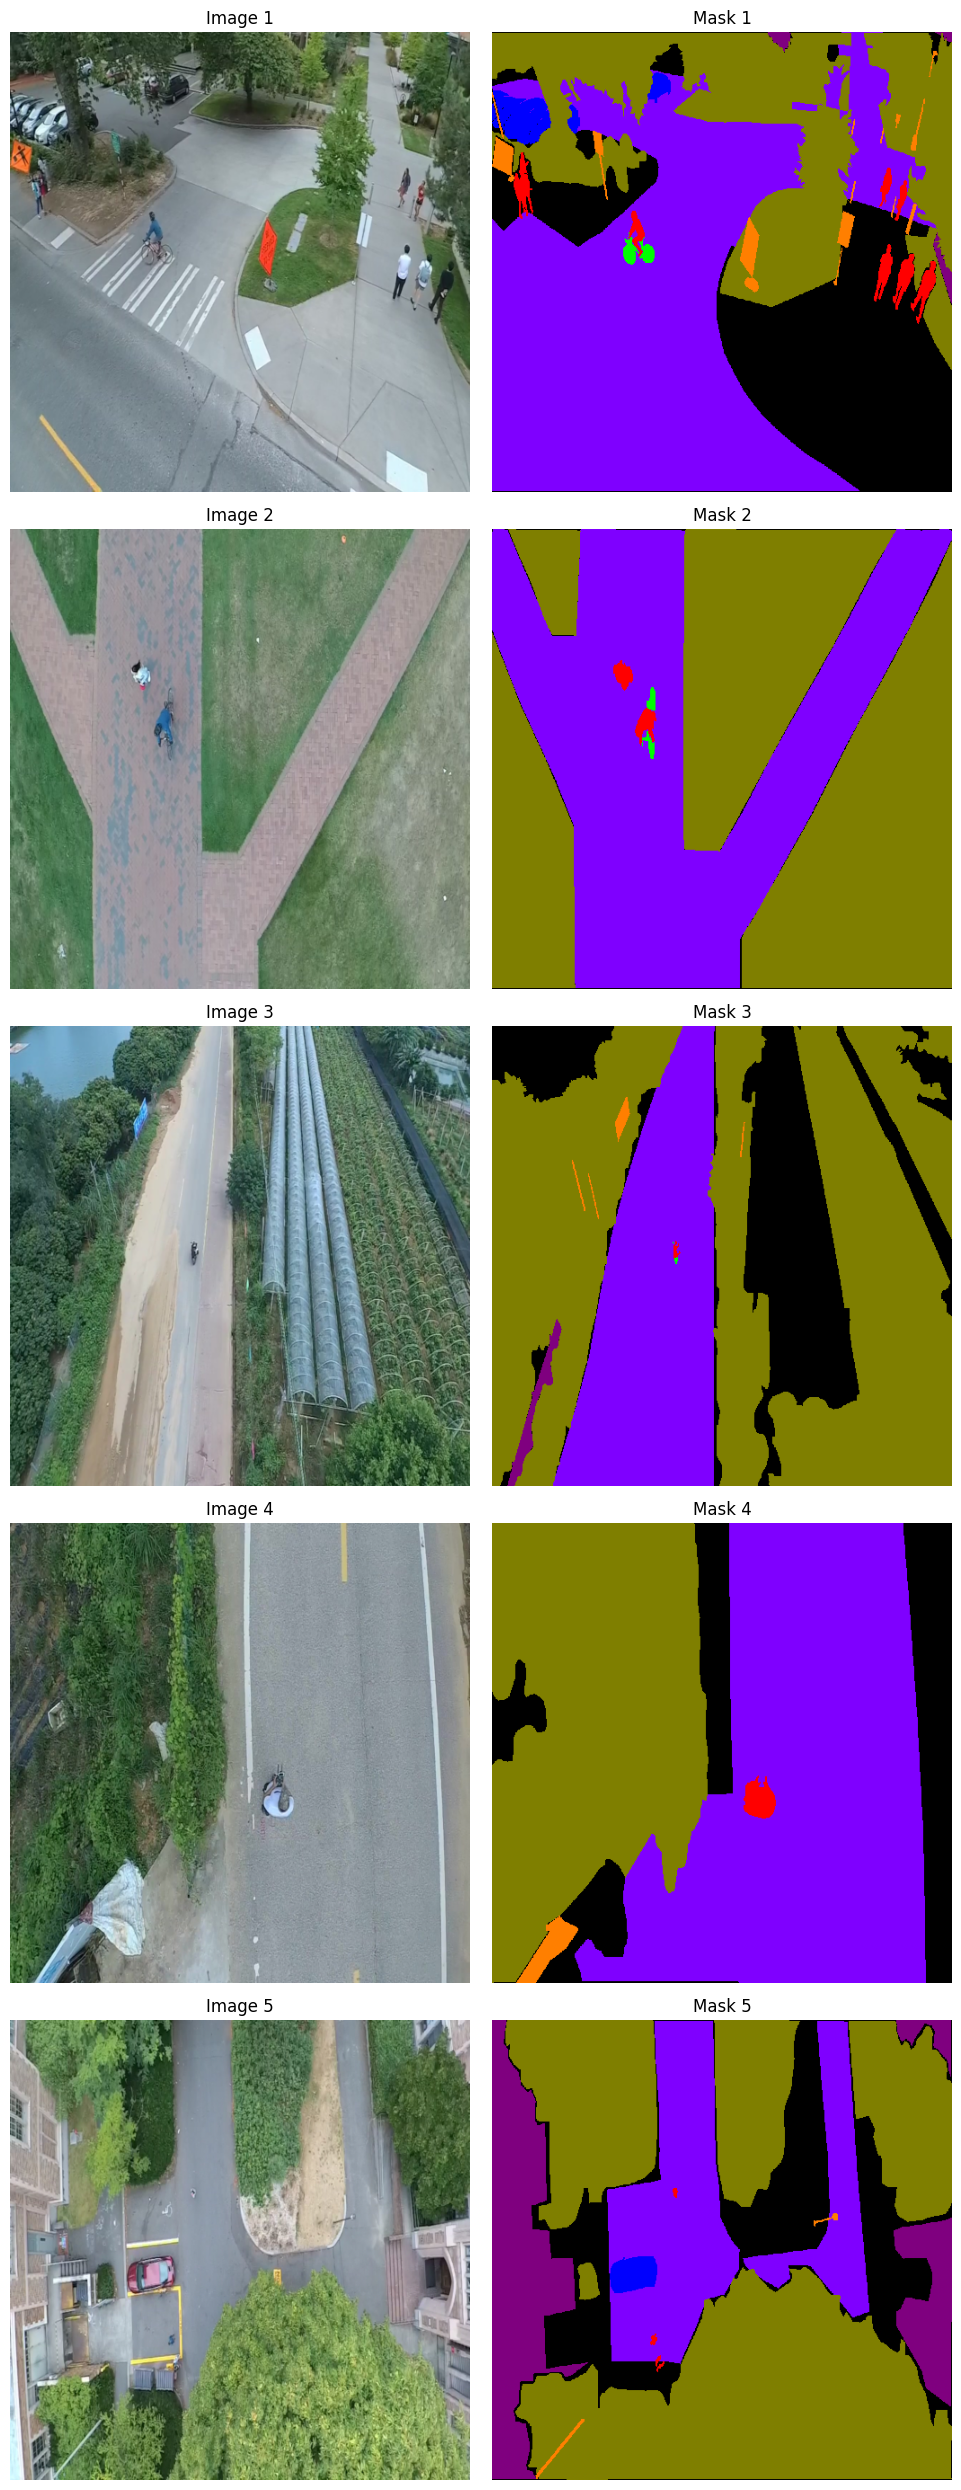

In [10]:
visualize_samples(train_dataset)

# **<font style="color:green">3. Evaluation Metrics </font>**

<p>This competition is evaluated on the mean <a href='https://en.wikipedia.org/wiki/Sørensen–Dice_coefficient'>Dice coefficient</a
>. The Dice coefficient can be used to compare the pixel-wise agreement between a predicted segmentation and its corresponding ground truth. The formula is given by: </p>

<p>$$DSC =  \frac{2 |X \cap Y|}{|X|+ |Y|}$$
$$ \small \mathrm{where}\ X = Predicted\ Set\ of\ Pixels,\ \ Y = Ground\ Truth $$ </p>
<p>The Dice coefficient is defined to be 1 when both X and Y are empty.</p>

**In this section, you have to implement the dice coefficient evaluation metric.**

## ***<font style="color:purple">3.1. Definition function Dice Coefficient</font>***

In [11]:
def dice_coefficient(pred, target, num_classes=NUM_CLASSES):
    """ Calculate Dice Coefficient.

    Args:
        pred (_type_): _type_
        target (_type_): _type_
        num_classes (_type_, optional): _description_. Defaults to NUM_CLASSES.

    Returns:
        _type_: _description_
    """    
    pred = pred.argmax(dim=1).flatten()  # Predikce z logits
    target = target.flatten()
    dice_scores = []
    for cls in range(num_classes):
        pred_cls = (pred == cls).float()
        target_cls = (target == cls).float()
        intersection = (pred_cls * target_cls).sum()
        dice = (2. * intersection + 1e-6) / (pred_cls.sum() + target_cls.sum() + 1e-6)
        dice_scores.append(dice.item())
    return np.mean(dice_scores), dice_scores

## ***<font style="color:purple">3.2. Definition class of Dice Loss</font>***

In [ ]:
class DiceLoss(nn.Module):
    """ Dice Loss implementation.

    Args:
        nn (_type_): _nn.Module_
    """    
    def __init__(self):
        super(DiceLoss, self).__init__()
    
    def forward(self, preds, targets):
        smooth = 1e-6
        intersection = (preds * targets).sum()
        union = preds.sum() + targets.sum()
        dice = (2. * intersection + smooth) / (union + smooth)
        return 1 - dice

# **<font style="color:green">4. Model</font>**

**In this section, you have to define your model.**

## ***<font style="color:purple">4.1. Definition of class Channel Attention</font>***

In [16]:
class ChannelAttention(nn.Module):
    """ Channel Attention Mechanism.

    Args:
        nn (_type_): _nn module_
    """       
    def __init__(self, in_channels, ratio=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(in_channels, in_channels // ratio),
            nn.ReLU(),
            nn.Linear(in_channels // ratio, in_channels),
            nn.Sigmoid()
        )

    def forward(self, x):
        """ Forward pass with channel attention.

        Args:
            x (_type_): _input tensor_

        Returns:
            _type_: _output tensor_
        """        
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

## ***<font style="color:purple">4.2. Definition class of SegNet model</font>***

In [17]:
class CustomSegNet(nn.Module):
    """ Custom SegNet with configurable encoder and decoder from JSON files.

    Args:
        nn (_type_): _nn module_
    """    
    def __init__(self, encoder_json='encoder.json', decoder_json='decoder.json', num_classes=NUM_CLASSES):
        """ Initialize the CustomSegNet.

        Args:
            encoder_json (str, optional): _description_. Defaults to 'encoder.json'.
            decoder_json (str, optional): _description_. Defaults to 'decoder.json'.
            num_classes (_type_, optional): _description_. Defaults to NUM_CLASSES.
        """        
        super().__init__()
        with open(encoder_json, 'r') as f:
            encoder_cfg = json.load(f)
        with open(decoder_json, 'r') as f:
            decoder_cfg = json.load(f)
        
        # Encoder
        encoder_layers = []
        in_channels = 3
        for layer in encoder_cfg['layers']:
            if layer['type'] == 'conv':
                encoder_layers.append(nn.Conv2d(in_channels, layer['filters'], kernel_size=3, padding=1))
                encoder_layers.append(nn.ReLU())
                in_channels = layer['filters']
            elif layer['type'] == 'pool':
                encoder_layers.append(nn.MaxPool2d(2, 2, return_indices=True))
            elif layer['type'] == 'attention':
                encoder_layers.append(ChannelAttention(in_channels))
            elif layer['type'] == 'dropout':
                encoder_layers.append(nn.Dropout(layer['rate']))
        self.encoder = nn.Sequential(*encoder_layers)
        
        # Decoder
        decoder_layers = []
        in_channels = encoder_cfg['layers'][-2]['filters'] if encoder_cfg['layers'] else 64
        for layer in decoder_cfg['layers']:
            if layer['type'] == 'unpool':
                decoder_layers.append(nn.MaxUnpool2d(2, 2))
            elif layer['type'] == 'conv':
                decoder_layers.append(nn.Conv2d(in_channels, layer['filters'], kernel_size=3, padding=1))
                decoder_layers.append(nn.ReLU())
                in_channels = layer['filters']
            elif layer['type'] == 'atrous':
                decoder_layers.append(nn.Conv2d(in_channels, layer['filters'], kernel_size=3, padding=layer['dilation'], dilation=layer['dilation']))
                decoder_layers.append(nn.ReLU())
                in_channels = layer['filters']
            elif layer['type'] == 'dropout':
                decoder_layers.append(nn.Dropout(layer['rate']))
        decoder_layers.append(nn.Conv2d(in_channels, num_classes, kernel_size=1))
        self.decoder = nn.Sequential(*decoder_layers)

    def forward(self, x):
        """ Forward pass through the network.

        Args:
            x (_type_): _input tensor_

        Returns:
            _type_: _output tensor_
        """        
        indices, sizes = [], []
        for layer in self.encoder:
            if isinstance(layer, nn.MaxPool2d):
                sizes.append(x.size())
                x, idx = layer(x)
                indices.append(idx)
            else:
                x = layer(x)
        
        for i, layer in enumerate(self.decoder):
            if isinstance(layer, nn.MaxUnpool2d):
                x = layer(x, indices.pop(), output_size=sizes.pop())
            else:
                x = layer(x)
        return x

# **<font style="color:green">5. Optimalization / Train</font>**

## ***<font style="color:purple">5.1. Optuna optimalization</font>***

### *<font style="color:brown">5.1.1 Hyperparameters setting for Optuna optimalization</font>*

In [ ]:
NUM_EPOCH_OPTIMALIZATION = 10
PATIENCE_OPTIMALIZATION = 3
NUMBER_OF_TRIALS = 3

### *<font style="color:brown">5.1.2 Function of Optuna optimalization definition</font>*

In [ ]:
def objective(trial):
    """ Optimization functions for Optun.

    Args:
        trial (_type_): _trial object_

    Returns:
        _type_: _best_val_loss_
    """    
    lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)
    batch_size = trial.suggest_int('batch_size', 4, 32, step=4)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    num_encoder_layers = trial.suggest_int('num_encoder_layers', 3, 6)
    num_decoder_layers = trial.suggest_int('num_decoder_layers', 3, 6)
    base_filters = trial.suggest_int('base_filters', 32, 128, step=32)
    use_attention = trial.suggest_categorical('use_attention', [True, False])
    use_atrous = trial.suggest_categorical('use_atrous', [True, False])
    
    encoder_cfg = {'layers': []}
    in_filters = 3
    for i in range(num_encoder_layers):
        filters = base_filters * (2 ** i)
        encoder_cfg['layers'].append({'type': 'conv', 'filters': filters})
        if use_attention and i % 2 == 0:
            encoder_cfg['layers'].append({'type': 'attention', 'channels': filters})
        encoder_cfg['layers'].append({'type': 'pool'})
        if dropout_rate > 0:
            encoder_cfg['layers'].append({'type': 'dropout', 'rate': dropout_rate})
    
    decoder_cfg = {'layers': []}
    in_filters = encoder_cfg['layers'][-2]['filters'] if encoder_cfg['layers'] else base_filters
    for i in range(num_decoder_layers - 1, -1, -1):
        filters = base_filters * (2 ** i)
        decoder_cfg['layers'].append({'type': 'unpool'})
        if use_atrous and i % 2 == 0:
            decoder_cfg['layers'].append({'type': 'atrous', 'filters': filters, 'dilation': 2})
        else:
            decoder_cfg['layers'].append({'type': 'conv', 'filters': filters})
        if dropout_rate > 0:
            decoder_cfg['layers'].append({'type': 'dropout', 'rate': dropout_rate})
    
    with open('encoder.json', 'w') as f:
        json.dump(encoder_cfg, f)
    with open('decoder.json', 'w') as f:
        json.dump(decoder_cfg, f)
    
    model = CustomSegNet().to(DEVICE)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = DiceLoss()
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    
    trial_id = trial.number
    writer = SummaryWriter(f"./runs/trial_{trial_id}")
    hparams = {
        'lr': lr, 'batch_size': batch_size, 'dropout_rate': dropout_rate,
        'num_encoder_layers': num_encoder_layers, 'num_decoder_layers': num_decoder_layers,
        'base_filters': base_filters, 'use_attention': use_attention, 'use_atrous': use_atrous
    }
    writer.add_hparams(hparams, {'hparam/val_loss': 0})
    
    encoder_text = "Encoder Layers:\n" + "\n".join([str(layer) for layer in encoder_cfg['layers']])
    decoder_text = "Decoder Layers:\n" + "\n".join([str(layer) for layer in decoder_cfg['layers']])
    writer.add_text('Config/Encoder', encoder_text, 0)
    writer.add_text('Config/Decoder', decoder_text, 0)
    
    best_val_loss = float('inf')
    for epoch in range(5):
        train_loss = train_epoch(model, train_loader, optimizer, criterion)
        writer.add_scalar('Loss/train', train_loss, epoch)
        val_loss, miou, ious = validate_epoch(model, val_loader, criterion)
        writer.add_scalar('Loss/val', val_loss, epoch)
        writer.add_scalar('Metrics/MeanIoU', miou, epoch)
        for c in range(12):
            writer.add_scalar(f'Metrics/ClassIoU_{c}', ious[c], epoch)
        if val_loss < best_val_loss:
            best_val_loss = val_loss
        writer.add_hparams(hparams, {'hparam/val_loss': best_val_loss})
    
    writer.close()
    return best_val_loss

## ***<font style="color:purple">5.2. Final Train</font>***

### *<font style="color:brown">5.2.1 Function of train epoch</font>*

In [ ]:
def train_epoch(model, train_loader, optimizer, criterion, scheduler=None):
    """ Tréninková epocha.

    Args:
        model (_type_): _model_
        train_loader (_type_): _loader_
        optimizer (_type_): _optimizer_
        criterion (_type_): _loss function_
        scheduler (_type_, optional): _scheduler_. Defaults to None.

    Returns:
        _type_: _avg_loss_
    """    
    model.train()
    total_loss = 0.0
    num_batches = len(train_loader)
    
    for batch_idx, (images, masks) in enumerate(train_loader):
        images, masks = images.to(DEVICE), masks.to(DEVICE)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        
        if batch_idx % 10 == 0:
            print(f"Batch {batch_idx}/{num_batches} - Loss: {loss.item():.4f}")
    
    avg_loss = total_loss / num_batches
    
    if scheduler is not None:
        scheduler.step()
    
    return avg_loss

### *<font style="color:brown">5.2.2 Function of validation epoch</font>*

In [ ]:
def validate_epoch(model, val_loader, criterion):
    """ Validace epochy.

    Args:
        model (_type_): _model_
        val_loader (_type_): _loader_
        criterion (_type_): _loss function_

    Returns:
        _type_: _avg_loss_, mean_iou, class_ious
    """    
    model.eval()
    total_loss = 0.0
    total_miou = 0.0
    class_ious = [0.0] * 12  # Assume 12 classes, adjust as needed
    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(DEVICE), masks.to(DEVICE)
            outputs = model(images)
            loss = criterion(outputs, masks)
            total_loss += loss.item()
            # Add IoU calculation (e.g. using torchmetrics)
            preds = outputs.argmax(dim=1)
            for c in range(12):
                iou = (torch.sum((preds == c) & (masks == c)).float() + 1e-6) / (torch.sum((preds == c) | (masks == c)).float() + 1e-6)
                class_ious[c] += iou.item()
            total_miou += torchmetrics.functional.jaccard_index(preds, masks, num_classes=12).item()
    return total_loss / len(val_loader), total_miou / len(val_loader), [iou / len(val_loader) for iou in class_ious]


### *<font style="color:brown">5.2.3 Function of training process</font>*

In [ ]:
def train_full_model(best_params=None, full_dataset=None, val_dataset=None, num_classes=12, num_epochs=30,
                     device='cuda', final_train=False):
    """ Final training of the model with the best hyperparameters.

    Args:
        best_params (_type_, optional): _best hyperparameters from Optuna_. Defaults to None.
        full_dataset (_type_, optional): _dataset for full training_. Defaults to None.
        val_dataset (_type_, optional): _dataset for validation_. Defaults to None.
        num_classes (int, optional): _number of classes_. Defaults to 12.
        num_epochs (int, optional): _number of epochs_. Defaults to 30.
        device (str, optional): _device to use_. Defaults to 'cuda'.
        final_train (bool, optional): _whether this is the final training_. Defaults to False.

    Raises:
        ValueError: _if final_train is True and best_params is None_

    Returns:
        _type_: _train_losses, val_losses, mean_ious, class_ious
    """    
    DEVICE = torch.device(device if torch.cuda.is_available() else 'cpu')
    
    if not final_train and best_params is None:
        print("Warning: Without best_params and final_train=False, training will fail. Pass best_params or set final_train=True.")
        return None
    
    if final_train and best_params is None:
        raise ValueError("For final_train=True, it is necessary to specify best_params from Optun.")
    
    if final_train:
        encoder_cfg = {'layers': []}
        in_filters = 3
        for i in range(best_params['num_encoder_layers']):
            filters = best_params['base_filters'] * (2 ** i)
            encoder_cfg['layers'].append({'type': 'conv', 'filters': filters})
            if best_params['use_attention'] and i % 2 == 0:
                encoder_cfg['layers'].append({'type': 'attention', 'channels': filters})
            encoder_cfg['layers'].append({'type': 'pool'})
            if best_params['dropout_rate'] > 0:
                encoder_cfg['layers'].append({'type': 'dropout', 'rate': best_params['dropout_rate']})
        
        decoder_cfg = {'layers': []}
        in_filters = encoder_cfg['layers'][-2]['filters'] if encoder_cfg['layers'] else best_params['base_filters']
        for i in range(best_params['num_decoder_layers'] - 1, -1, -1):
            filters = best_params['base_filters'] * (2 ** i)
            decoder_cfg['layers'].append({'type': 'unpool'})
            if best_params['use_atrous'] and i % 2 == 0:
                decoder_cfg['layers'].append({'type': 'atrous', 'filters': filters, 'dilation': 2})
            else:
                decoder_cfg['layers'].append({'type': 'conv', 'filters': filters})
            if best_params['dropout_rate'] > 0:
                decoder_cfg['layers'].append({'type': 'dropout', 'rate': best_params['dropout_rate']})
        
        with open('encoder.json', 'w') as f:
            json.dump(encoder_cfg, f)
        with open('decoder.json', 'w') as f:
            json.dump(decoder_cfg, f)
    
    model = CustomSegNet().to(DEVICE)
    if final_train:
        optimizer = optim.Adam(model.parameters(), lr=best_params['lr'])
        batch_size = best_params['batch_size']
    else:
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        batch_size = 4
    
    criterion = DiceLoss()
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
    full_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    
    writer = SummaryWriter("./runs/final_train" if final_train else "./runs/experiment")
    train_losses, val_losses, mean_ious, class_ious = [], [], [], [[] for _ in range(num_classes)]
    
    for epoch in range(num_epochs):
        train_loss = train_epoch(model, full_loader, optimizer, criterion, scheduler)
        train_losses.append(train_loss)
        val_loss, miou, ious = validate_epoch(model, val_loader)
        val_losses.append(val_loss)
        mean_ious.append(miou)
        for c in range(num_classes):
            class_ious[c].append(ious[c])
        
        writer.add_scalar('Loss/train', train_loss, epoch)
        writer.add_scalar('Loss/val', val_loss, epoch)
        writer.add_scalar('Metrics/MeanIoU', miou, epoch)
        for c in range(num_classes):
            writer.add_scalar(f'Metrics/ClassIoU_{c}', ious[c], epoch)
        
        checkpoint_dir = './checkpoints/final' if final_train else './checkpoints/experiment'
        os.makedirs(checkpoint_dir, exist_ok=True)
        checkpoint_path = f"{checkpoint_dir}/model_epoch_{epoch}.pth"
        torch.save(model.state_dict(), checkpoint_path)
        print(f"Checkpoint saved: {checkpoint_path}")
        
        if not val_losses or val_loss < min(val_losses):
            best_model_path = f"{checkpoint_dir}/best_model.pth"
            torch.save(model.state_dict(), best_model_path)
            print(f"Best model saved: {best_model_path}")
        
        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Mean IoU: {miou:.4f}")
    
    writer.close()
    return train_losses, val_losses, mean_ious, class_ious

## ***<font style="color:purple">5.3. Run Optimalization/Final Train</font>***

### *<font style="color:brown">5.3.1 Definition Main funciton</font>*

In [ ]:
def main(mode='optimize', n_trials=10, num_epochs=30, full_dataset=None, val_dataset=None, train_dataset=None):
    """
    Main function to start optimization or final training.
    
    Args:
        mode (str): 'optimize' for optimization, 'train' for final training (default: 'optimize').
        n_trials (int): Number of trials for optimization (default: 10).
        num_epochs (int): Number of epochs for training (default: 30).
        full_dataset (Dataset): Dataset for final training.
        val_dataset (Dataset): Dataset for validation.
        train_dataset (Dataset): Dataset for optimization.
    """
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    if mode == 'optimize':
        print("Running optimization with Optuna...")
        study = optuna.create_study(direction="minimize")
        study.optimize(lambda trial: objective(trial), n_trials=n_trials)
        best_params = study.best_params
        print(f"Nejlepší hyperparametry: {best_params}")
        return best_params
    elif mode == 'train':
        print("Final training begins...")
        if full_dataset is None or val_dataset is None:
            raise ValueError("For the final training, full_dataset and val_dataset are needed.")
        best_params = main('optimize', n_trials=n_trials, train_dataset=train_dataset, val_dataset=val_dataset)  # Get best_params
        train_losses, val_losses, mean_ious, class_ious = train_full_model(
            best_params=best_params,
            full_dataset=full_dataset,
            val_dataset=val_dataset,
            num_epochs=num_epochs,
            final_train=True
        )
        print("Final training completed. Metrics saved.")
        return train_losses, val_losses, mean_ious, class_ious
    else:
        raise ValueError("Invalid mode. Use 'optimize' or 'train'.")

### *<font style="color:brown">5.3.2 Implementation Main function</font>*

In [ ]:
if __name__ == "__main__":
    # Simulate datasets (replace with real data)
    from SemSegDataset import SemSegDataset  # I assume you have a dataset defined
    DATA_PATH = '/kaggle/input/semsegp4'
    train_dataset = SemSegDataset(DATA_PATH, 'images', 'masks', 'train.csv')
    val_dataset = SemSegDataset(DATA_PATH, 'images', 'masks', 'val.csv')
    full_dataset = SemSegDataset(DATA_PATH, 'images', 'masks', 'full.csv')  # Combination train + val
    
    # Calling main
    # Optimization
    best_params = main(mode='optimize', n_trials=5, train_dataset=train_dataset, val_dataset=val_dataset)
    
    # Final training (after optimization)
    # train_losses, val_losses, mean_ious, class_ious = main(
    #     mode='train',
    #     num_epochs=30,
    #     full_dataset=full_dataset,
    #     val_dataset=val_dataset,
    #     train_dataset=train_dataset
    # )

# <font style="color:green">6. Inference</font>

- **In this section, you have to train the model and infer on sample data.**


- **You can write your trainer class in this section.**


- **If you are using any loss function other than PyTorch standard loss function, you have to define in this section.**


- **This section should also have optimizer and LR-schedular (if using) details.**



## <font style="color:green">6.2. Inference [3 Points]</font>

**Plot some sample inference in this sub-section.**

**for example:**

---

<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w12-sample-predtiction.png'>

---



# <font style="color:green">6. Prepare Submission CSV [10 Points]</font>

**Write your code to prepare the submission CSV file.**


**Note that in the submission file, you have to write Encoded Pixels.**

[Here is a blog to understand what is Encoded Pixels.](https://medium.com/analytics-vidhya/generating-masks-from-encoded-pixels-semantic-segmentation-18635e834ad0)

# <font style="color:green">7. Kaggle Profile Link [50 Points]</font>

Share your Kaggle profile link here with us so that we can give points for the competition score. 

You should have a minimum IoU of `0.60` on the test data to get all points. If the IoU is less than `0.55`, you will not get any points for the section. 

**You must have to submit `submission.csv` (prediction for images in `test.csv`) in `Submit Predictions` tab in Kaggle to get any evaluation in this section.**